<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="6">Hello Capstone Project!</font></h1>

### Objectives:
1. To predict severity of an accident 
2. The target or label columns needs to be accident "Severity". The attributes (impacting factors) could be injuries, human fatality, traffic delay, property damage, or more. 
2. The machine learning model should be able to predict accident "severity" with reliable accuracy.
3. The dataset should be rich enough to contain large number of observations (rows) and various attributes (columns) that could be used to train/test the model.

In [1]:
# install seaborn, commented as already installed
#!conda install -c anaconda seaborn -y

Let's first load required libraries:

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

### About dataset

This dataset is about past data on car collisions. The __Collisions.csv__ data includes details of more than 2.21L traffic accidents with 40 parameter columns. Part of the data could be used to analyse accident severity factors for establishing the machine learning model. Rest of the data could be used to test the accuracy of the model.

Let's download the dataset. The code is disabled after the download to avoid version conflicts if any. Downloaded file is attached along with code file. 

In [3]:
#!wget -O Collisions.csv http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv

In [4]:
%pwd

'/resources/labs/Exercises'

### Load Data From CSV File  

In [5]:
df = pd.read_csv('Collisions.csv')
df.shape

(221389, 40)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221389 entries, 0 to 221388
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                213918 non-null  float64
 1   Y                213918 non-null  float64
 2   OBJECTID         221389 non-null  int64  
 3   INCKEY           221389 non-null  int64  
 4   COLDETKEY        221389 non-null  int64  
 5   REPORTNO         221389 non-null  object 
 6   STATUS           221389 non-null  object 
 7   ADDRTYPE         217677 non-null  object 
 8   INTKEY           71884 non-null   float64
 9   LOCATION         216801 non-null  object 
 10  EXCEPTRSNCODE    100986 non-null  object 
 11  EXCEPTRSNDESC    11779 non-null   object 
 12  SEVERITYCODE     221388 non-null  object 
 13  SEVERITYDESC     221389 non-null  object 
 14  COLLISIONTYPE    195159 non-null  object 
 15  PERSONCOUNT      221389 non-null  int64  
 16  PEDCOUNT         221389 non-null  int6

In [7]:
df.describe(include='all')

X              Y      OBJECTID         INCKEY  \
count   213918.000000  213918.000000  221389.00000  221389.000000   
unique            NaN            NaN           NaN            NaN   
top               NaN            NaN           NaN            NaN   
freq              NaN            NaN           NaN            NaN   
mean      -122.330756      47.620199  110695.00000  144708.701914   
std          0.030055       0.056043   63909.64371   89126.729589   
min       -122.419091      47.495573       1.00000    1001.000000   
25%       -122.349280      47.577151   55348.00000   71634.000000   
50%       -122.330363      47.616053  110695.00000  127184.000000   
75%       -122.311998      47.664290  166042.00000  209783.000000   
max       -122.238949      47.734142  221389.00000  333843.000000   

            COLDETKEY REPORTNO   STATUS ADDRTYPE         INTKEY  \
count   221389.000000   221389   221389   217677   71884.000000   
unique            NaN   221386        2        3            NaN   
top               NaN  1782439  Matched    Block            NaN   
freq              NaN        2   195232   144917            NaN   
mean    144936.934541      NaN      NaN      NaN   37612.330964   
std      89501.312920      NaN      NaN      NaN   51886.084219   
min       1001.000000      NaN      NaN      NaN   23807.000000   
25%      71634.000000      NaN      NaN      NaN   28652.750000   
50%     127184.000000      NaN      NaN      NaN   29973.000000   
75%     210003.000000      NaN      NaN      NaN   33984.000000   
max     335343.000000      NaN      NaN      NaN  757580.000000   

                                                 LOCATION  ... ROADCOND  \
count                                              216801  ...   195050   
unique                                              25198  ...        9   
top     BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...  ...      Dry   
freq                                                  298  ...   128535   
mean                                                  NaN  ...      NaN   
std                                                   NaN  ...      NaN   
min                                                   NaN  ...      NaN   
25%                                                   NaN  ...      NaN   
50%                                                   NaN  ...      NaN   
75%                                                   NaN  ...      NaN   
max                                                   NaN  ...      NaN   

       LIGHTCOND PEDROWNOTGRNT    SDOTCOLNUM SPEEDING  ST_COLCODE  \
count     194880          5192  1.272050e+05     9928      211976   
unique         9             1           NaN        1          63   
top     Daylight             Y           NaN        Y          32   
freq      119448          5192           NaN     9928       44922   
mean         NaN           NaN  7.971063e+06      NaN         NaN   
std          NaN           NaN  2.611523e+06      NaN         NaN   
min          NaN           NaN  1.007024e+06      NaN         NaN   
25%          NaN           NaN  6.007029e+06      NaN         NaN   
50%          NaN           NaN  8.033011e+06      NaN         NaN   
75%          NaN           NaN  1.018101e+07      NaN         NaN   
max          NaN           NaN  1.307202e+07      NaN         NaN   

                    ST_COLDESC     SEGLANEKEY  CROSSWALKKEY  HITPARKEDCAR  
count                   195159  221389.000000  2.213890e+05        221389  
unique                      62            NaN           NaN             2  
top     One parked--one moving            NaN           NaN             N  
freq                     44922            NaN           NaN        209392  
mean                       NaN     261.296320  9.583127e+03           NaN  
std                        NaN    3247.953616  7.148311e+04           NaN  
min                        NaN       0.000000  0.000000e+00           NaN  
25%                        NaN       0.000000  0

#### With the given dataset, severity code is identified as the target variable (labelled or dependent) while rest of the fields are noted as independent variables or the attributes. The case objective along with given data does qualify as a Classification problem of the Supervised Machine Learning. 

Based on the summary above, the table has 221389 rows of data. 

I. Columns having less relevance to 'Severity' perspective are dropped as shown below. Please refer report for rationale against each column;
1.	"X",
2.	"Y",
3.	"OBJECTID",
4.	"INCKEY",
5.	"COLDETKEY",
6.	"REPORTNO",
7.	"STATUS",
8.	"INTKEY",
9.	"LOCATION",
10.	"EXCEPTRSNCODE",
11.	"EXCEPTRSNDESC",
12.	"INCDATE",
13.	"INCDTTM",        
14.	"INATTENTIONIND",
15.	"UNDERINFL",
16.	"PEDROWNOTGRNT",
17.	"SDOTCOLNUM",
18.	"SPEEDING",
19.	"SEGLANEKEY",
20.	"CROSSWALKKEY"
  
II. Misssing data treatment can be taken as marked below;
   1. "ADDRTYPE": 2% missing data - Replace by frequency
   2. "COLLISIONTYPE": 12% missing data - Replace by frequency
   3. "JUNCTIONTYPE": 5.5% missing data - Replace by frequency
   4. "WEATHER": 12% missing data - Replace by frequency
   5. "ROADCOND": 12% missing data - Replace by frequency
   6. "LIGHTCOND": 12% missing data - Replace by frequency
   7. "ST_COLCODE": 4.3% missing data - Replace by frequency

In [8]:
df.drop(["X",
"Y",
"OBJECTID",
"INCKEY",
"COLDETKEY",
"REPORTNO",
"STATUS",
"INTKEY",
"LOCATION",
"EXCEPTRSNCODE",
"EXCEPTRSNDESC",
"INCDATE",
"INCDTTM",        
"INATTENTIONIND",
"UNDERINFL",
"PEDROWNOTGRNT",
"SDOTCOLNUM",
"SPEEDING",
"SEGLANEKEY",
"CROSSWALKKEY"],axis = 1, inplace=True)

We also drop main target variable rows that are empty or have SEVERITYCODE '0' or with description'Unknown'. Further we convert the
column into numerical by replacing character code with numeric and converting inti 'int' type.

In [9]:
df.dropna(subset=["SEVERITYCODE"], axis=0, inplace=True)
df = df.drop(df[df['SEVERITYCODE'].isin (['0'])].index)
df['SEVERITYCODE'].replace(to_replace=['2b'], value=[4],inplace=True)
df[["SEVERITYCODE"]] = df[["SEVERITYCODE"]].astype("int")

In [10]:
#replace the missing colum values values for all columns above by the most frequent
df["ADDRTYPE"].replace(np.nan, df['ADDRTYPE'].value_counts().idxmax(), inplace=True)
df["COLLISIONTYPE"].replace(np.nan, df['COLLISIONTYPE'].value_counts().idxmax(), inplace=True)
df["JUNCTIONTYPE"].replace(np.nan, df['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
df["WEATHER"].replace(np.nan, df['WEATHER'].value_counts().idxmax(), inplace=True)
df["ROADCOND"].replace(np.nan, df['ROADCOND'].value_counts().idxmax(), inplace=True)
df["LIGHTCOND"].replace(np.nan, df['LIGHTCOND'].value_counts().idxmax(), inplace=True)
df["SDOT_COLCODE"].replace(np.nan, df['SDOT_COLCODE'].value_counts().idxmax(), inplace=True)
df["ST_COLCODE"].replace(np.nan, df['ST_COLCODE'].value_counts().idxmax(), inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199794 entries, 0 to 221388
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ADDRTYPE         199794 non-null  object 
 1   SEVERITYCODE     199794 non-null  int64  
 2   SEVERITYDESC     199794 non-null  object 
 3   COLLISIONTYPE    199794 non-null  object 
 4   PERSONCOUNT      199794 non-null  int64  
 5   PEDCOUNT         199794 non-null  int64  
 6   PEDCYLCOUNT      199794 non-null  int64  
 7   VEHCOUNT         199794 non-null  int64  
 8   INJURIES         199794 non-null  int64  
 9   SERIOUSINJURIES  199794 non-null  int64  
 10  FATALITIES       199794 non-null  int64  
 11  JUNCTIONTYPE     199794 non-null  object 
 12  SDOT_COLCODE     199794 non-null  float64
 13  SDOT_COLDESC     199794 non-null  object 
 14  WEATHER          199794 non-null  object 
 15  ROADCOND         199794 non-null  object 
 16  LIGHTCOND        199794 non-null  obje

Let's see how the attributes (contributing factors) are correlated with label severity. We can use Heat Maps to depict the coorelation.

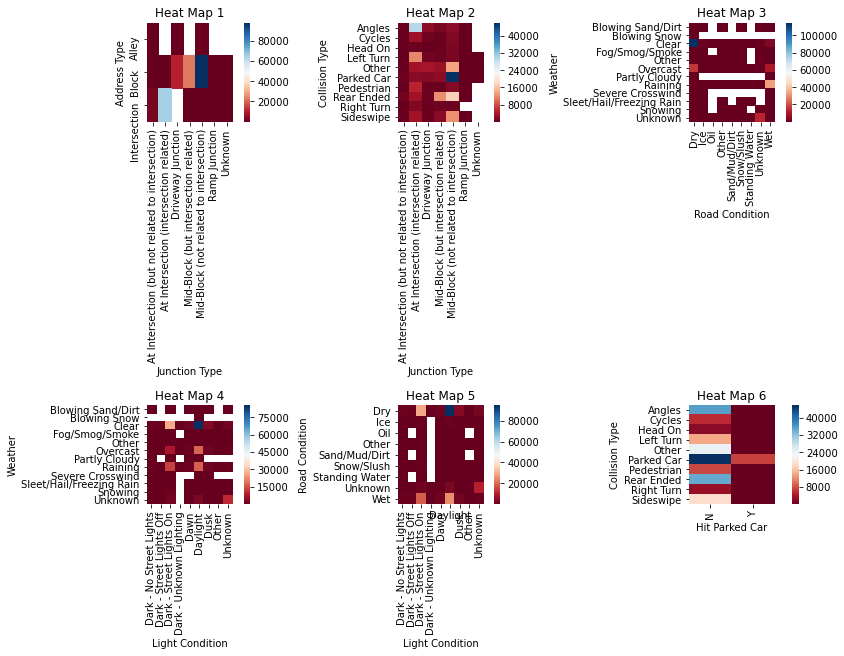

In [12]:
from matplotlib.gridspec import GridSpec

# Define number of rows and columns you want in your figure
nrow = 2
ncol = 3

# Make a new figure
fig=plt.figure(figsize=(12,9),constrained_layout=True)

# Design your figure properties
widths = [5,5,5,1]
gs = GridSpec(nrow, ncol + 1, figure=fig, width_ratios=widths)
# Fill your figure with desired plots
axes = []
axes.append(fig.add_subplot(gs[0,0]))
axes.append(fig.add_subplot(gs[0,1]))
axes.append(fig.add_subplot(gs[0,2]))
axes.append(fig.add_subplot(gs[1,0]))
axes.append(fig.add_subplot(gs[1,1]))
axes.append(fig.add_subplot(gs[1,2]))

# Subplot 1:

df_gptest1 = df[['ADDRTYPE','JUNCTIONTYPE','SEVERITYCODE']]
grouped_test1 = df_gptest1.groupby(['ADDRTYPE','JUNCTIONTYPE'],as_index=False).count()
grouped_pivot1 = grouped_test1.pivot(index='ADDRTYPE',columns='JUNCTIONTYPE')
g1 = sns.heatmap(grouped_pivot1,cmap="RdBu",cbar=True,ax=axes[0],annot=False)
g1.set_title('Heat Map 1')
g1.set_ylabel('Address Type')
g1.set_xlabel('Junction Type')
row_labels1 = grouped_pivot1.columns.levels[1]
col_labels1 = grouped_pivot1.index
#move ticks and labels to the center
g1.set_xticks(np.arange(grouped_pivot1.shape[1]) + 0.5, minor=False)
g1.set_yticks(np.arange(grouped_pivot1.shape[0]) + 0.5, minor=False)
#insert labels
g1.set_xticklabels(row_labels1, minor=False)
g1.set_yticklabels(col_labels1, minor=False)

# Subplot 2: 

df_gptest2 = df[['COLLISIONTYPE','JUNCTIONTYPE','SEVERITYCODE']]
grouped_test2 = df_gptest2.groupby(['COLLISIONTYPE','JUNCTIONTYPE'],as_index=False).count()
grouped_pivot2 = grouped_test2.pivot(index='COLLISIONTYPE',columns='JUNCTIONTYPE')

g2 = sns.heatmap(grouped_pivot2,cmap="RdBu",cbar=True,ax=axes[1])
g2.set_title('Heat Map 2')
g2.set_ylabel('Collision Type')
g2.set_xlabel('Junction Type')
row_labels2 = grouped_pivot2.columns.levels[1]
col_labels2 = grouped_pivot2.index
#move ticks and labels to the center
g2.set_xticks(np.arange(grouped_pivot2.shape[1]) + 0.5, minor=False)
g2.set_yticks(np.arange(grouped_pivot2.shape[0]) + 0.5, minor=False)
#insert labels
g2.set_xticklabels(row_labels2, minor=False)
g2.set_yticklabels(col_labels2, minor=False)

# Subplot 3: 

df_gptest3 = df[['WEATHER','ROADCOND','SEVERITYCODE']]
grouped_test3 = df_gptest3.groupby(['WEATHER','ROADCOND'],as_index=False).count()
grouped_pivot3 = grouped_test3.pivot(index='WEATHER',columns='ROADCOND')
g3 = sns.heatmap(grouped_pivot3,cmap="RdBu",ax=axes[2])
g3.set_title('Heat Map 3')
g3.set_ylabel('Weather')
g3.set_xlabel('Road Condition')
row_labels3 = grouped_pivot3.columns.levels[1]
col_labels3 = grouped_pivot3.index
#move ticks and labels to the center
g3.set_xticks(np.arange(grouped_pivot3.shape[1]) + 0.5, minor=False)
g3.set_yticks(np.arange(grouped_pivot3.shape[0]) + 0.5, minor=False)
#insert labels
g3.set_xticklabels(row_labels3, minor=False)
g3.set_yticklabels(col_labels3, minor=False)

# Subplot 4: 

df_gptest4 = df[['WEATHER','LIGHTCOND','SEVERITYCODE']]
grouped_test4 = df_gptest4.groupby(['WEATHER','LIGHTCOND'],as_index=False).count()
grouped_pivot4 = grouped_test4.pivot(index='WEATHER',columns='LIGHTCOND')
g4 = sns.heatmap(grouped_pivot4,cmap="RdBu",cbar=True,ax=axes[3])
g4.set_title('Heat Map 4')
g4.set_ylabel('Weather')
g4.set_xlabel('Light Condition')
row_labels4 = grouped_pivot4.columns.levels[1]
col_labels4 = grouped_pivot4.index
#move ticks and labels to the center
g4.set_xticks(np.arange(grouped_pivot4.shape[1]) + 0.5, minor=False)
g4.set_yticks(np.arange(grouped_pivot4.shape[0]) + 0.5, minor=False)
#insert labels
g4.set_xticklabels(row_labels4, minor=False)
g4.set_yticklabels(col_labels4, minor=False)

# Subplot 5: 

df_gptest5 = df[['ROADCOND','LIGHTCOND','SEVERITYCODE']]
grouped_test5 = df_gptest5.groupby(['ROADCOND','LIGHTCOND'],as_index=False).count()
grouped_pivot5 = grouped_test5.pivot(index='ROADCOND',columns='LIGHTCOND')
g5 = sns.heatmap(grouped_pivot5,cmap="RdBu",cbar=True,ax=axes[4])
g5.set_title('Heat Map 5')
g5.set_ylabel('Road Condition')
g5.set_xlabel('Light Condition')
row_labels5 = grouped_pivot5.columns.levels[1]
col_labels5 = grouped_pivot5.index
#move ticks and labels to the center
g5.set_xticks(np.arange(grouped_pivot5.shape[1]) + 0.5, minor=False)
g5.set_yticks(np.arange(grouped_pivot5.shape[0]) + 0.5, minor=False)
#insert labels
g5.set_xticklabels(row_labels5, minor=False)
g5.set_yticklabels(col_labels5, minor=False)

# Subplot 6: 

df_gptest6 = df[['COLLISIONTYPE','HITPARKEDCAR','SEVERITYCODE']]
grouped_test6 = df_gptest6.groupby(['COLLISIONTYPE','HITPARKEDCAR'],as_index=False).count()
grouped_pivot6 = grouped_test6.pivot(index='COLLISIONTYPE',columns='HITPARKEDCAR')
g6 = sns.heatmap(grouped_pivot6,cmap="RdBu",ax=axes[5])
g6.set_title('Heat Map 6')
g6.set_ylabel('Collision Type')
g6.set_xlabel('Hit Parked Car')
row_labels6 = grouped_pivot6.columns.levels[1]
col_labels6 = grouped_pivot6.index
#move ticks and labels to the center
g6.set_xticks(np.arange(grouped_pivot6.shape[1]) + 0.5, minor=False)
g6.set_yticks(np.arange(grouped_pivot6.shape[0]) + 0.5, minor=False)
#insert labels
g6.set_xticklabels(row_labels6, minor=False)
g6.set_yticklabels(col_labels6, minor=False)

#rotate label if too long
plt.xticks(rotation=90)
plt.show()

## Make a clean feature set and use one hot encoding technique to convert multi-class categorical varables to binary/numerical variables

In [13]:
df_clean = df[['ADDRTYPE','SEVERITYCODE','SEVERITYDESC','COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 
               'INJURIES','SERIOUSINJURIES','FATALITIES','JUNCTIONTYPE','SDOT_COLCODE','SDOT_COLDESC', 'WEATHER', 'ROADCOND', 
               'LIGHTCOND','ST_COLCODE','ST_COLDESC','HITPARKEDCAR']]
df_clean = pd.concat([df,pd.get_dummies(df[['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE','SDOT_COLCODE','WEATHER', 'ROADCOND', 
                                            'LIGHTCOND','ST_COLCODE','HITPARKEDCAR']])], axis=1)
df_clean.drop(['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE','SDOT_COLCODE','WEATHER', 'ROADCOND', 'LIGHTCOND','ST_COLCODE',
               'HITPARKEDCAR'], axis = 1,inplace=True)

In [14]:
df_clean.info(max_cols=130)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199794 entries, 0 to 221388
Data columns (total 126 columns):
 #   Column                                                          Non-Null Count   Dtype 
---  ------                                                          --------------   ----- 
 0   SEVERITYCODE                                                    199794 non-null  int64 
 1   SEVERITYDESC                                                    199794 non-null  object
 2   PERSONCOUNT                                                     199794 non-null  int64 
 3   PEDCOUNT                                                        199794 non-null  int64 
 4   PEDCYLCOUNT                                                     199794 non-null  int64 
 5   VEHCOUNT                                                        199794 non-null  int64 
 6   INJURIES                                                        199794 non-null  int64 
 7   SERIOUSINJURIES                               

## Save the cleaned data set in a new file so as to use it directly in repeated trials further.

In [15]:
df_clean.to_csv('Collisions-Clean-Hot-Encoded.csv')

In [16]:
#df_clean = pd.read_csv('Collisions-Clean-Hot-Encoded.csv')

## Exploratory Data Analysis

We need to explore which characteristics have significant impact on target 'Severity' categorical varible

In [17]:
df_corr=df_clean.copy()
df_corr.corr()
df_corr.shape

(199794, 126)

### Drop columns with dtype 'object' to keep the data set purely numerical

In [18]:
df_corr.drop(["SEVERITYDESC","SDOT_COLDESC","ST_COLDESC"], axis=1, inplace=True)

In [19]:
from scipy import stats

dict={"Column Name":["Pearson Correlation Coefficient","P-value"]}
for column in df_corr.columns.values.tolist():
    pearson_coef, p_value = stats.pearsonr(df_corr[column], df_corr['SEVERITYCODE'])
    dict[column]=[pearson_coef,p_value]
df_dict = pd.DataFrame(dict)
df_dict_clean=df_dict.transpose(copy=True)
df_dict_clean.rename(columns={0: 'Pearson Correlation Coefficient',1:'P-value'}, inplace=True)
df_dict_clean.reset_index(inplace=True)
df_dict_clean

index  Pearson Correlation Coefficient   P-value
0       Column Name  Pearson Correlation Coefficient   P-value
1      SEVERITYCODE                                1         0
2       PERSONCOUNT                         0.111502         0
3          PEDCOUNT                         0.287916         0
4       PEDCYLCOUNT                          0.21327         0
..              ...                              ...       ...
119   ST_COLCODE_85                      -0.00135595  0.544459
120   ST_COLCODE_87                       0.00365506  0.102312
121   ST_COLCODE_88                      0.000344291  0.877695
122  HITPARKEDCAR_N                        0.0947789         0
123  HITPARKEDCAR_Y                       -0.0947789         0

[124 rows x 3 columns]

#### Drop unwanted first 2 rows and list only rows with higher than moderate positive Pearson Coefficients and P-value near 0

In [20]:
df_dict_clean.drop([0,1], axis=0, inplace=True)
df_dict_clean[df_dict_clean['Pearson Correlation Coefficient'] > 0.3]

index Pearson Correlation Coefficient P-value
6         INJURIES                        0.735846       0
7  SERIOUSINJURIES                        0.468547       0

In [21]:
df_corr.info(max_cols=130)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199794 entries, 0 to 221388
Data columns (total 123 columns):
 #   Column                                                          Non-Null Count   Dtype
---  ------                                                          --------------   -----
 0   SEVERITYCODE                                                    199794 non-null  int64
 1   PERSONCOUNT                                                     199794 non-null  int64
 2   PEDCOUNT                                                        199794 non-null  int64
 3   PEDCYLCOUNT                                                     199794 non-null  int64
 4   VEHCOUNT                                                        199794 non-null  int64
 5   INJURIES                                                        199794 non-null  int64
 6   SERIOUSINJURIES                                                 199794 non-null  int64
 7   FATALITIES                                             

### Prepare feature sets for working with algorithms

#### Let's define feature sets, X and y:

In [22]:
Feature = df_clean[['INJURIES','SERIOUSINJURIES']]
x=Feature
x_knn=Feature

In [23]:
y = df_clean['SEVERITYCODE']
df_target=df_clean[['SEVERITYCODE']]

## Normalize Data 

Data Standardization makes data zero mean and unit variance

In [24]:
X= preprocessing.StandardScaler().fit(x).transform(x)
X_knn= preprocessing.StandardScaler().fit(x_knn).transform(x_knn)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


# Classification model development

We can use the following algorithms to tarin and test the classification machine learning model:
- Logistic Regression:
    It fits a special s-shaped curve by transforming the numeric estimate into a probability with the sigmoid function ùúé.
- K Nearest Neighbor(KNN):
    A prediction point takes into account the 'K' nearest points to it to determine its classification.
- Decision Tree:
    Based on the 'minimizing entropy (degree of randomness)' and 'maximising information gain (certainty)' criteria

# Logistic Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
LR = LogisticRegression(C=0.01, solver='saga').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
lr_jac = jaccard_similarity_score(y_test, yhat)
lr_f1_score=f1_score(y_test, yhat, average='weighted')
lr_log_loss=log_loss(y_test, yhat_prob)
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test, yhat))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Logistic Regression's Accuracy:  0.9975475066317423


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     41199
           2       1.00      1.00      1.00     17707
           3       0.00      0.00      0.00       108
           4       0.99      0.96      0.97       925

   micro avg       1.00      1.00      1.00     59939
   macro avg       0.75      0.74      0.74     59939
weighted avg       1.00      1.00      1.00     59939

Confusion matrix, without normalization
[[41199     0     0     0]
 [    0 17707     0     0]
 [   72    28     0     8]
 [    0    39     0   886]]


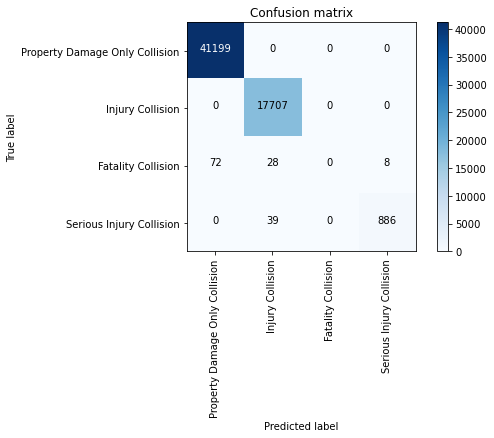

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,3,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['Property Damage Only Collision','Injury Collision','Fatality Collision','Serious Injury Collision'],normalize= False,  title='Confusion matrix')

# K Nearest Neighbor(KNN)
We find the best __k__ to build the model with the best accuracy.  

In [28]:
from sklearn.neighbors import KNeighborsClassifier
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split( X_knn, y, test_size=0.3, random_state=4)
Ks = 5
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_knn_train,y_knn_train)
    yhat=neigh.predict(X_knn_test)
    mean_acc[n-1] = metrics.accuracy_score(y_knn_test, yhat)
    std_acc[n-1]=np.std(yhat==y_knn_test)/np.sqrt(yhat.shape[0])
mean_acc
knn_jac = jaccard_similarity_score(y_knn_test, yhat)
knn_f1_score=f1_score(y_knn_test, yhat, average='weighted')
print("KNN Testset Accuracy: ", mean_acc[n-1])

KNN Testset Accuracy:  0.9979479137122741


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


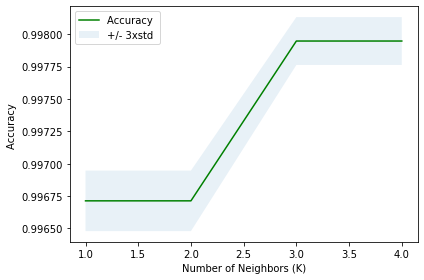

The best accuracy was with 0.9979479137122741 with k = 3


In [29]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)

# Decision Tree

In [30]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

In [31]:
SeverityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
SeverityTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
predTree = SeverityTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
dtree_jac = jaccard_similarity_score(y_test, predTree)
dtree_f1_score=f1_score(y_test, predTree, average='weighted')

DecisionTrees's Accuracy:  0.9979479137122741


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1) 
treeclf.fit(X_train,y_train)
# compute the feature importances
df_imp_feature=pd.DataFrame({'feature':x, 'importance':treeclf.feature_importances_}).sort_values(by='importance', ascending=False)
df_imp_feature.head(10)

feature  importance
0                       (I, N, J, U, R, I, E, S)    0.932811
1  (S, E, R, I, O, U, S, I, N, J, U, R, I, E, S)    0.067189

In [34]:
df_imp_feature[df_imp_feature['importance'] >= 0.3]

feature  importance
0  (I, N, J, U, R, I, E, S)    0.932811

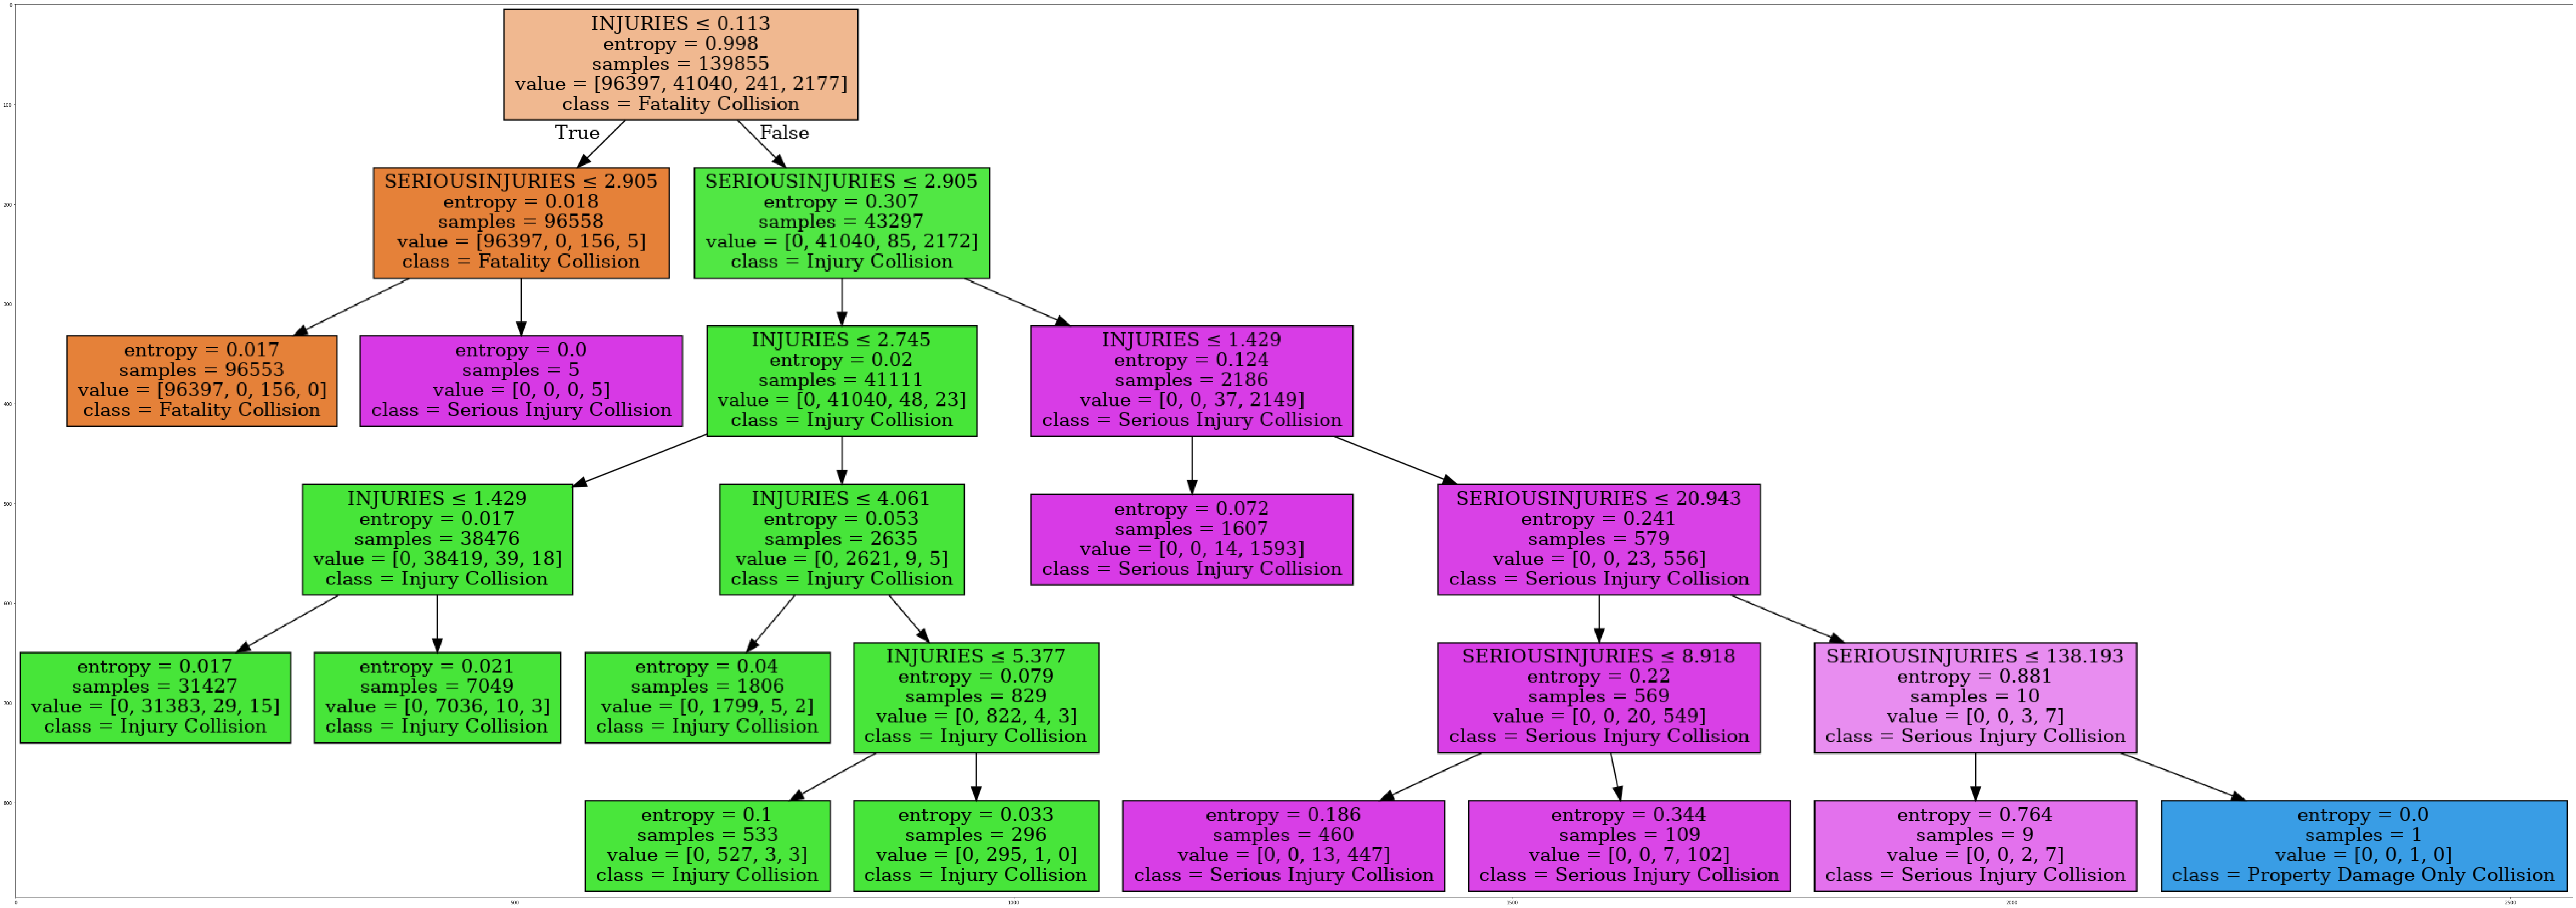

In [35]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg

dot_data = StringIO()
filename = "severitydesc.png"
y=df_clean['SEVERITYDESC']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
featureNames = x.columns[0:123]
out=tree.export_graphviz(SeverityTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Report
Here we report accuracy of the built model using different evaluation metrics:

In [36]:
Report={'Algorithm':['KNN','Decision Tree','Logistic Regression'],'Jaccard':[knn_jac,dtree_jac,lr_jac],
       'F1-score':[knn_f1_score,dtree_f1_score,lr_f1_score],
       'LogLoss':['NA','NA',lr_log_loss]}
report_frame=pd.DataFrame(Report)
report_frame.set_index('Algorithm',inplace=True)
report_frame

Jaccard  F1-score    LogLoss
Algorithm                                         
KNN                  0.997948  0.997047         NA
Decision Tree        0.997948  0.997047         NA
Logistic Regression  0.997548  0.996641  0.0307093

## ------------------------------------------End of File--------------------------------------------